# **Cocoon: Semantic Table Profiling Using Large Language Models**

Provide your table, and the semantic profile will be ready in ~10 min and cost < 10 cents.

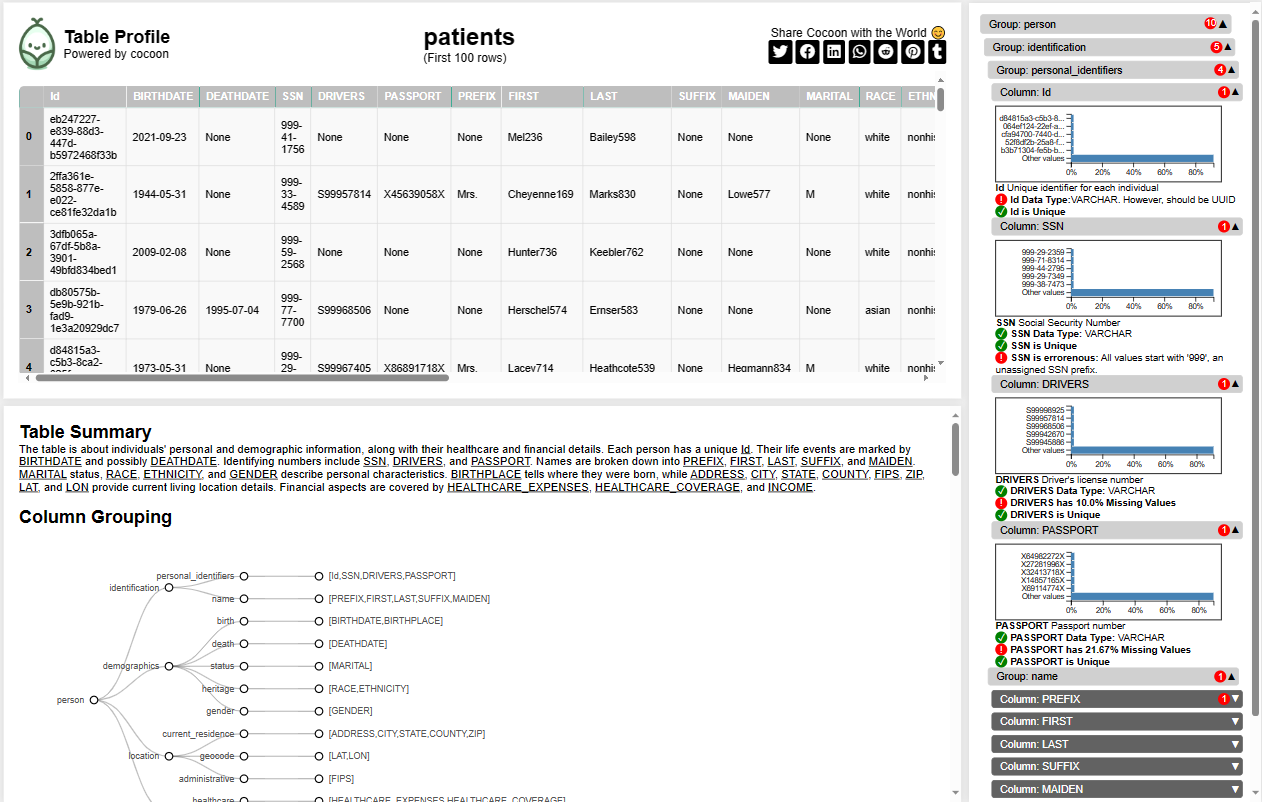

In [1]:
# @title 1.Install Cocoon { vertical-output: true }
! pip install cocoon_data==0.1.87

In [2]:
# @title 2. Provide LLM API Key { vertical-output: true }
from cocoon_data import *

openai_key = '' # @param {type:"string"}
claude_key = '' # @param {type:"string"}

# test if LLM works
test_message = "hello" # @param {type:"string"}

# set up your openai api key
openai.api_key = openai_key

# or use claude
os.environ["ANTHROPIC_API_KEY"] = claude_key
if claude_key != '':
  openai.api_type ='claude'


messages = [{"role": "user", "content": test_message}]
response = call_llm_chat(messages, temperature=0.1, top_p=0.1)
print(response['choices'][0]['message']['content'])

Hello! How can I assist you today?


In [3]:
# @title 3. Read your csv as Pandas df (for demo, we will download a dataset) { vertical-output: true }
import requests

files = {
    "patients.csv": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/patients.csv",
}

# Loop through the files dictionary
for file_name, url in files.items():
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open file in binary write mode
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"{file_name} downloaded successfully.")
    else:
        print(f"Failed to download {file_name}.")

table_name = "patients"
df = pd.read_csv("patients.csv")
df.head()

patients.csv downloaded successfully.


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,eb247227-e839-88d3-447d-b5972468f33b,2021-09-23,NaN,999-41-1756,NaN,NaN,NaN,Mel236,Bailey598,NaN,...,Framingham,Massachusetts,Middlesex County,25017.0,1701,42.275650,-71.476367,2520.80,4323.64,170754
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944-05-31,NaN,999-33-4589,S99957814,X45639058X,Mrs.,Cheyenne169,Marks830,NaN,...,Taunton,Massachusetts,Bristol County,25005.0,2718,41.892884,-71.066686,205342.20,94647.00,40526
2,3dfb065a-67df-5b8a-3901-49bfd834bed1,2009-02-08,NaN,999-59-2568,NaN,NaN,NaN,Hunter736,Keebler762,NaN,...,Winchendon,Massachusetts,Worcester County,25027.0,1475,42.670059,-72.074664,16381.92,17447.87,79884
3,db80575b-5e9b-921b-fad9-1e3a20929dc7,1979-06-26,1995-07-04,999-77-7700,S99968506,NaN,NaN,Herschel574,Ernser583,NaN,...,Boston,Massachusetts,Suffolk County,25025.0,2131,42.395516,-71.059015,3850.00,44057.32,6420
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973-05-31,NaN,999-29-2359,S99967405,X86891718X,Mrs.,Lacey714,Heathcote539,NaN,...,Hingham,Massachusetts,Plymouth County,25023.0,2043,42.200723,-70.836590,66662.10,1777031.06,933420


In [12]:
# @title 4. Load data to database (In mem DuckDB for demo) { vertical-output: true }

# For the demo case, we set up an in memory database
df.columns = [clean_column_name(col) for col in df.columns]
con = duckdb.connect(database=':memory:')
con.register(table_name, df)

query_widget, cocoon_workflow = create_cocoon_workflow(con)

In [13]:
#@title Query Widget { vertical-output: true }
query_widget.display()

In [14]:
#@title Cocoon Widget { vertical-output: true }

cocoon_workflow.start_workflow()

🔍 Exploring table patients ...


Button(button_style='info', description='Explore', icon='search', style=ButtonStyle(), tooltip='Click to explo…

🧐 There are 27 columns in the table.
👨‍⚕️ If you want to exclude any column, please specify them:
